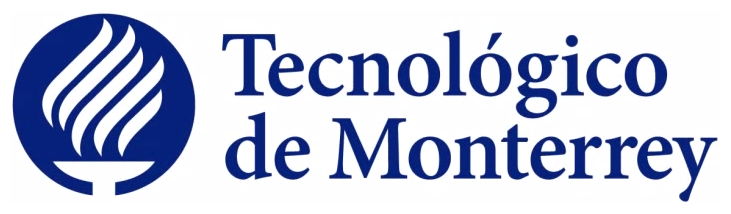

# PROYECTO INTEGRADOR: CO2 Mass Balance

# Avance 2. Ingeniería de características

# PRESENTADO POR:

## Miguel Ángel Aguilera Rodríguez - A00642541

## Carlos Jesús Peñaloza Julio - A01793931

## Alberto Patraca Sotomayor - A01793469

# PROFESORA:

##Dra. Grettel Barceló Alonso

##Dra. Eduviges Ludivina Facundo Flores

# 2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

In [ ]:
"""
Lo primero que realizamos es importar las librerías requeridas, en el caso de
esta actividad, solo requerimos de pandas y numpy para el manejo de los datos
así como de google.colab para poder leer archivos de drive
"""

import numpy as np
import pandas as pd

from google.colab import drive

In [ ]:
# Cambiamos la cantidad de columnas máximas que se muestran

pd.set_option('display.max_columns', 3000)

In [ ]:
# Montamos el drive, para poder acceder al archivo del dataset

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = '/content/drive/MyDrive/PI - CO2 Mass Balance/mock.csv'

initial_df = pd.read_csv(csv_path)
initial_df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
# Describimos las características del dataset

initial_df.dtypes

,0
3,int64
?,object
alfa-romero,object
gas,object
std,object
two,object
convertible,object
rwd,object
front,object
88.6,float64


In [ ]:
numerical_columns = ['2548', '168.8', '130', '9.0']
ordinal_columns = []

target_columns = [*numerical_columns, *ordinal_columns]

target_df = initial_df[target_columns]
target_df.head()

,2548,168.8,130,9.0
0,2548,168.8,130,9.0
1,2823,171.2,152,9.0
2,2337,176.6,109,10.0
3,2824,176.6,136,8.0
4,2507,177.3,136,8.5


# 2.2 Abordar y corregir los problemas identificados en los datos.

In [ ]:
target_df.isnull().sum()

,0
2548,0
168.8,0
130,0
9.0,0


In [ ]:
target_df.isna().sum()

,0
2548,0
168.8,0
130,0
9.0,0


In [ ]:
# Una vez limpios los datos, podemos realizar descripciones del dataset

target_df.describe()

,2548,168.8,130,9.0
count,204.000000,204.000000,204.000000,204.000000
mean,2555.602941,174.075000,126.892157,10.148137
std,521.960820,12.362123,41.744569,3.981000
min,1488.000000,141.100000,61.000000,7.000000
25%,2145.000000,166.300000,97.000000,8.575000
50%,2414.000000,173.200000,119.500000,9.000000
75%,2939.250000,183.200000,142.000000,9.400000
max,4066.000000,208.100000,326.000000,23.000000


In [ ]:
target_df.corr(numeric_only=True)

,2548,168.8,130,9.0
2548,1.000000,0.878090,0.850611,0.151372
168.8,0.878090,1.000000,0.683830,0.157913
130,0.850611,0.683830,1.000000,0.029083
9.0,0.151372,0.157913,0.029083,1.000000


# 2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

# 2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.